# DSM2 as a graph network
DSM2 is a network of junctions and reservoirs with connections of either channels, reservoir connections or gates. In this view of DSM2 the input tables that represent the hydrodynamic network can be represented as a mathematical graph.
This view allows some interesting questions to be asked and answered. 
E.g.
What is the shortest path from one node to another? (if it exists)
What nodes are downstream of this node?
What nodes are upstream of this node?
and many more graph related information

For illustrating this concept, this notebook shows how the tables can be easily converted to a graph using networkx package and answering some these interesting questions

In [1]:
from pydsm.input import parser, network
import networkx as nx

## Read in input file
Open the hydro echo file and read it

In [2]:
fname='../../tests/data/hydro_echo_historical_v82.inp'
with open(fname, 'r') as file:
    tables = parser.parse(file.read())

## Convert to a graph network 
The channel tables contain upnode and downnode connections. The reservoir_connection table contains the nodes to which the reservoirs connect. These can be used to construct a directed graph network

In [3]:
c = tables['CHANNEL']
gc = nx.from_pandas_edgelist(c, source='UPNODE', target='DOWNNODE', edge_attr=list(
     c.columns), create_using=nx.MultiDiGraph)
rc = tables['RESERVOIR_CONNECTION']
grc1 = nx.from_pandas_edgelist(rc, source='RES_NAME', target='NODE', edge_attr=list(
     rc.columns), create_using=nx.MultiDiGraph)
grc2 = nx.from_pandas_edgelist(rc, source='NODE', target='RES_NAME', edge_attr=list(
     rc.columns), create_using=nx.MultiDiGraph)

## Drawing graph networks
Some examples of what these graphs construted from tables look like...

### Reservoir connections

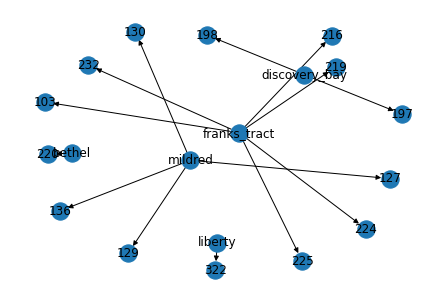

In [4]:
nx.draw(grc1, arrows=True, with_labels=True, pos=nx.spring_layout(grc1))

Combine the directed reservoir node connection graphs (one for incoming and other for outgoing)

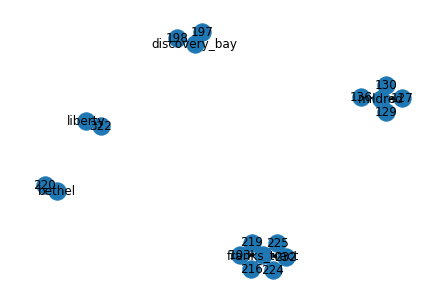

In [5]:
grc=nx.compose(grc1,grc2)
nx.draw(grc, arrows=True, with_labels=True, pos=nx.spring_layout(grc))

### Combine reservoir connections and channel table for a complete graph

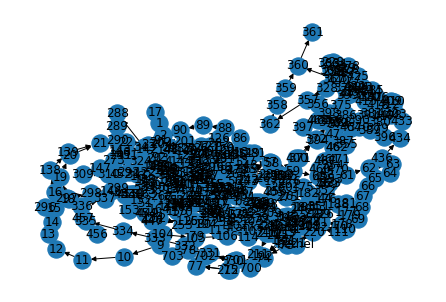

In [6]:
gall=nx.compose(gc,grc)
nx.draw(gall, arrows=True, with_labels=True, pos=nx.spring_layout(gall))

### Use the pydsm.input.network module to encapsulate the building in one method

In [7]:
g=network.build_network(tables)

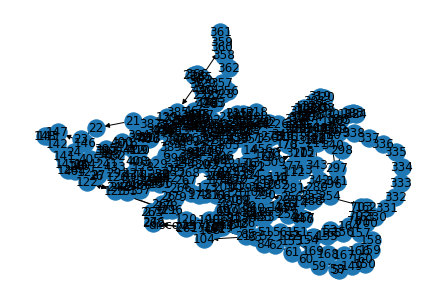

In [8]:
nx.draw(g,arrows=True, with_labels=True, pos=nx.spring_layout(g))

## Utilizing graph information
You can leverage the graph theory to charaterize DSM2's flow network

In [9]:
print('Is this graph strongly connected? :',nx.is_strongly_connected(gall))
print('Number of strongly connected components: ', nx.number_strongly_connected_components(gall))
print('Is this graph weakly connected? :',nx.is_weakly_connected(gall))
print('Number of weakly connected components: ', nx.number_weakly_connected_components(gall))
print('Weakly connected components: ', list(nx.weakly_connected_components(gall)))

Is this graph strongly connected? : False
Number of strongly connected components:  402
Is this graph weakly connected? : True
Number of weakly connected components:  1
Weakly connected components:  [{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187

### Show all the shortest paths between two nodes
E.g. in this case it is node 17 ( the San Joaquin River boundary) and the 361 (Martinez) 

In [10]:
print(list(nx.all_shortest_paths(gall,17,361)))

[[17, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 138, 139, 21, 22, 23, 24, 25, 26, 29, 30, 31, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 469, 45, 461, 46, 47, 463, 356, 357, 362, 358, 359, 360, 361], [17, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 138, 139, 21, 22, 23, 24, 25, 26, 29, 30, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 469, 45, 461, 46, 47, 463, 356, 357, 362, 358, 359, 360, 361], [17, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 138, 139, 21, 22, 23, 24, 25, 26, 29, 30, 31, 33, 34, 35, 37, 38, 39, 40, 41, 42, 226, 44, 469, 45, 461, 46, 47, 463, 356, 357, 362, 358, 359, 360, 361], [17, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 138, 139, 21, 22, 23, 24, 25, 26, 29, 30, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 226, 44, 469, 45, 461, 46, 47, 463, 356, 357, 362, 358, 359, 360, 361], [17, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 138, 139, 21, 22, 23, 24, 25, 26, 29, 30, 31, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43,

### or between node and reservoir
or show the shortest paths between a reservoir and a node

In [11]:
print(list(nx.all_shortest_paths(gall,'liberty',361)))

[['liberty', 322, 323, 316, 350, 351, 352, 353, 354, 355, 464, 465, 356, 357, 362, 358, 359, 360, 361]]


### Use holoviews visualization library for zoom and pan around functionality

In [12]:
import hvplot.networkx as hvnx
hvnx.draw_spring(gall, labels='index', width=900, height=600)

:Overlay
   .Graph.I  :Graph   [start,end]
   .Labels.I :Labels   [x,y]   (index)

### Graph Info

In [13]:
print(nx.info(gall))

MultiDiGraph with 439 nodes and 549 edges


### Test that  all nodes connect to 361 (Boundary) 

In [14]:
for node in gall.nodes:
    print(list(nx.shortest_path(gall,node,361)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 138, 139, 21, 22, 23, 24, 25, 26, 29, 30, 31, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 469, 45, 461, 46, 47, 463, 356, 357, 362, 358, 359, 360, 361]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 138, 139, 21, 22, 23, 24, 25, 26, 29, 30, 31, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 469, 45, 461, 46, 47, 463, 356, 357, 362, 358, 359, 360, 361]
[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 138, 139, 21, 22, 23, 24, 25, 26, 29, 30, 31, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 469, 45, 461, 46, 47, 463, 356, 357, 362, 358, 359, 360, 361]
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 138, 139, 21, 22, 23, 24, 25, 26, 29, 30, 31, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 469, 45, 461, 46, 47, 463, 356, 357, 362, 358, 359, 360, 361]
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 138, 139, 21, 22, 23, 24, 25, 26, 29, 30, 31, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 469, 45, 461, 46, 47, 463, 356, 357, 362, 358, 359, 

[275, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 40, 41, 42, 43, 44, 469, 45, 461, 46, 47, 463, 356, 357, 362, 358, 359, 360, 361]
[276, 277, 264, 265, 266, 267, 268, 269, 270, 271, 272, 40, 41, 42, 43, 44, 469, 45, 461, 46, 47, 463, 356, 357, 362, 358, 359, 360, 361]
[277, 264, 265, 266, 267, 268, 269, 270, 271, 272, 40, 41, 42, 43, 44, 469, 45, 461, 46, 47, 463, 356, 357, 362, 358, 359, 360, 361]
[278, 279, 266, 267, 268, 269, 270, 271, 272, 40, 41, 42, 43, 44, 469, 45, 461, 46, 47, 463, 356, 357, 362, 358, 359, 360, 361]
[279, 266, 267, 268, 269, 270, 271, 272, 40, 41, 42, 43, 44, 469, 45, 461, 46, 47, 463, 356, 357, 362, 358, 359, 360, 361]
[281, 282, 283, 284, 285, 286, 287, 271, 272, 40, 41, 42, 43, 44, 469, 45, 461, 46, 47, 463, 356, 357, 362, 358, 359, 360, 361]
[282, 283, 284, 285, 286, 287, 271, 272, 40, 41, 42, 43, 44, 469, 45, 461, 46, 47, 463, 356, 357, 362, 358, 359, 360, 361]
[283, 284, 285, 286, 287, 271, 272, 40, 41, 42, 43, 44, 469, 45, 461, 46, 47, 463, 3

### Test that not all nodes are connected to node 1

In [15]:
try:
    for node in gall.nodes:
        print(list(nx.shortest_path(gall,node,1)))
    print('Test failed. Every node is connected to 1')
except Exception as e:
    print(e) 

[1]
No path between 2 and 1.


In [16]:
nx.is_directed_acyclic_graph(gall)

False

In [17]:
nx.flow_hierarchy(gall)

0.8743169398907104

In [18]:
list(nx.neighbors(gall,1))

[2]

In [19]:
list(nx.neighbors(gall,'mildred'))

[127, 129, 130, 136]

In [20]:
list(nx.neighbors(gall,'franks_tract'))

[103, 216, 219, 224, 225, 232]